# Exercise 3

Work on this before the next lecture on 19 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to your GitHub repository for this course before the next lecture starts and post a link to your repository in [this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/7). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

The overall idea of this exercise is to get started and the nto freely experiment with the building blocks fo keras.

# The Dataset

To get going we will use a dataset which contains images of fashion items. It was created by [Zalanod research](https://github.com/zalandoresearch/fashion-mnist) to provide an alternative to the old MNIST digits dataset. Fashion MNIST is small like MNIST (28x28 pixel images), good size (60000 examples), and significantly harder than MNIST.

There are ten classes (or types) of items:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [53]:
# plotting imports and setup
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import keras


## Keras

We will use the Keras library through out this course. It is a high-level interface to tensorflow. Quoting [the keras website](https://keras.io/):

> It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
>
> Use Keras if you need a deep learning library that:
>
>   * Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
>   * Supports both convolutional networks and recurrent networks, as well as combinations of the two.
>   * Runs seamlessly on CPU and GPU.

### Note
To use keras you will have to first install it with `pip install tensorflow keras`.

In [54]:
# Fashion MNIST is built into keras
import keras
from keras.datasets import fashion_mnist

In [55]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [56]:
# How is the data stored?
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

('Training data shape:', (60000L, 28L, 28L))
('Training labels shape:', (60000L,))


There are 60000 examples, each of shape `28x28`. This makes sense as we are dealing with images that are 28x28 pixels big. Let's look at a few.

In [57]:
# classes are already shuffled
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [58]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

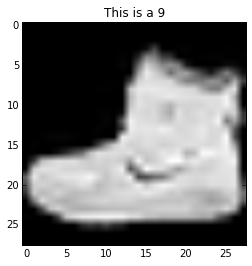

In [59]:
plt.imshow(X_train[0], cmap='gray')
plt.title("This is a %i" % y_train[0]);

> ### Challenge
>
> Make a function that plots a single example and uses a human readable label instead of an integer (replace the 9 in the previous example with "ankleboot"). You can find the human labels [here](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles).

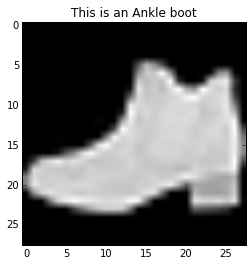

In [61]:
# your code here
id_number = 15
hum_lbl = {0 : "a T-shirt/top",
           1 : "a Trouser",
           2 : "a Pullover",
           3 : "a Dress",
           4 : "a Coat",
           5 : "a Sandal",
           6 : "a Shirt",
           7 : "a Sneaker",
           8 : "a Bag",
           9 : "an Ankle boot"}

plt.imshow(X_train[id_number], cmap='gray')
plt.title("This is %s" %hum_lbl[y_train[id_number]])



# A first neural network

Let's build a first neural network. Fit it to some toy data. In its simple form this is equivalent to performing logistic regression. Experiment with different toy datasets and adding more layers of different widths to the network. Try out different activation functions (nonlinearities).

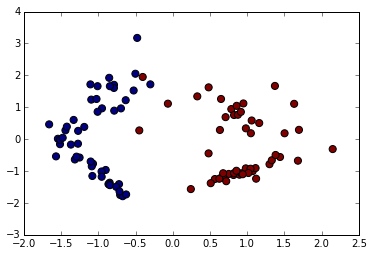

In [62]:
from sklearn.datasets import make_classification


X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, random_state=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=50)

In [63]:
import numpy as np


def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

Y_ = one_hot(2, y)

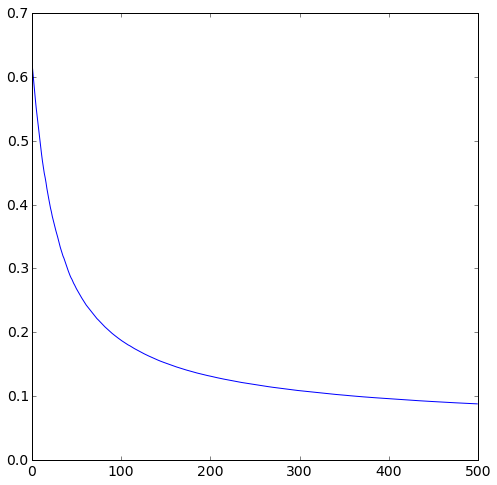

In [86]:
from keras.layers import Input, Dense, Activation
from keras.models import Model
from keras.utils import plot_model

np.random.seed(123+3)

# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(2)(inputs)
# to find out more about activations check the keras documentation
predictions = Activation('softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )
# to fit the model uncomment this line, experiment with the various settings
history = model.fit(X, Y_, epochs=500, verbose=False)

plt.plot(history.history['loss'])

In [65]:
print model.predict(np.array([[1,.9], [1,-.9]]))

[[0.01899468 0.9810053 ]
 [0.01917851 0.9808215 ]]


## Questions

* plot the decision surface of the network
* create a circle-in-circle dataset and try to classify it
  * basically try to repliacte [this tensorflow playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.88320&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) setup or something similar to it.
  
  
---

1. Plot the decision surface of the network:

(<matplotlib.figure.Figure at 0x106b76d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0xe3dbc88>)

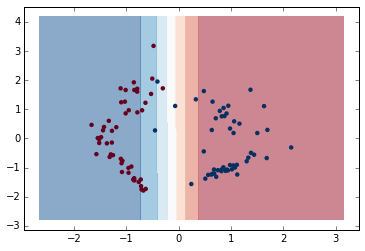

In [66]:
def plot_decision_boundary(X, y, model, steps=50, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 50
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    
    # Plot decision boundary in region of interest
    z = labels[:,0].reshape(xx.shape)
    
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

plot_decision_boundary(X, y, model, cmap='RdBu')


2. Classification of circle-in-circle array 

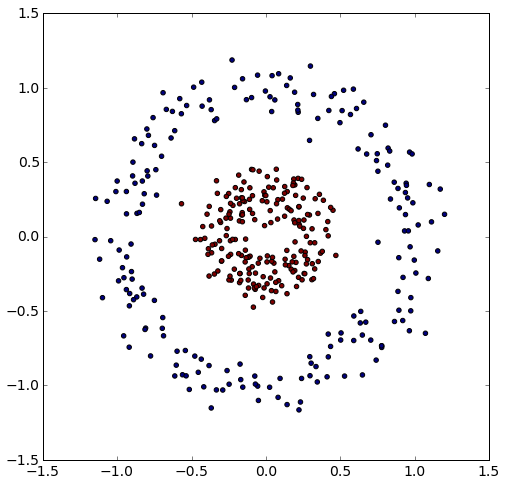

In [81]:
%matplotlib inline
from sklearn.datasets import make_circles
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

X2, y2 = make_circles(n_samples=400, factor=.3, noise=.1)
#labels = ['b', 'r']
#y2 = np.take(labels, (y2 < 0.5))

plt.scatter(X2[:,0], X2[:,1], c=y2)
Y2_ = one_hot(2, y2)

(400L, 2L) 400


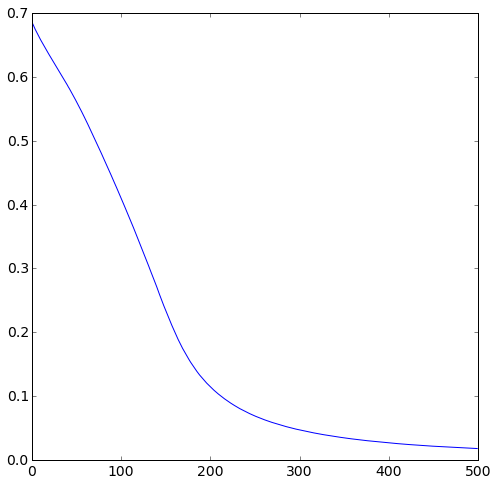

In [90]:
np.random.seed(123+4)

print X2.shape, y2.size

# This returns a tensor to represent the input
inputs = Input(shape=(2,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(4, activation='relu')(inputs)
x = Dense(4, activation='relu')(x)


# to find out more about activations check the keras documentation
#predictions = Activation('relu')(x)
predictions = Dense(2, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model2 = Model(inputs=inputs, outputs=predictions)
model2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )
# to fit the model uncomment this line, experiment with the various settings
history = model2.fit(X2, Y2_, epochs=500, verbose=False)
print history

plt.plot(history.history['loss'])

(<matplotlib.figure.Figure at 0x19471828>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1abde550>)

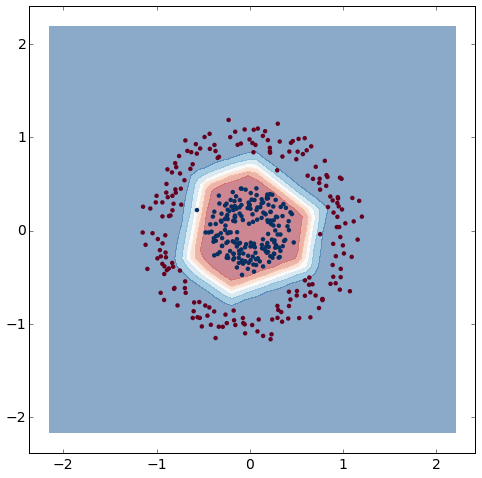

In [92]:
plot_decision_boundary(X2, y2, model2, cmap='RdBu')

# Fashion neural network

Now let's graduate to classifying fashion items. The structure should be very similar to the simple neural network but you might need more layers of different widths.

* what network structures work?
  * more layers or wider layers or both?
* how good can you make your network?
  * what did you use as baseline to compare your performance to?
* experiment!
* (bonus) how does your NN compare to a random forest with about 200 trees (or some other decision tree based classifier)?

In [93]:
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Split off some validation data

To measure our Neural Networks performance we will need some validation data. The `train_test_split` helper from scikit-learn does this for us.

In [94]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=10000,
                                                  random_state=42)

### One more thing

We need to convert the labels from integers (0, 1, 2, 3, ...) to  a one-hot encoding. The one-hot encoding for a problem with ten classes is a ten dimensional vector for each sample. For a sample in class 4 every entry is zero except for the fourth one. Let's check it out:

In [95]:
from keras import utils


num_classes = 10
y_train_ = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [96]:
y_train[:5]

array([5, 0, 0, 1, 4], dtype=uint8)

In [97]:
# modified y
y_train_[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [98]:
# let's make y_train the same as the others
y_train = utils.to_categorical(y_train, num_classes)

# Model building

We now define the model architecture and train the model. To learn more about the building blocks that are available check out the [keras documentation](https://keras.io/layers/about-keras-layers/).

In [99]:
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten

In [163]:
# we define the input shape (i.e., how many input features) **without** the batch size
x = Input(shape=(28, 28, ))

# turn a 28x28 matrix into a 784-d vector, this removes all information
# about the spatial relation between pixels. Using convolutions will
# allow us to take advantage of that information (see later)
h = Flatten()(x)

#
# your network architecture here
#

# we want to predict one of ten classes
h = Dense(1000)(h)
h = Dense(1000)(h)
h = Dense(1000)(h)
h = Dense(10)(h)

y = Activation('softmax')(h)

#looking at the val_loss/val_acc the better approach was so far increase both numbers of layers and apply wider layers,
# however there is a clear saturation in perfomance optimization.


# Package it all up in a Model
net = Model(x, y)

## Model structure

You can print out the structure of your network and check how many parameters it has, etc

In [164]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        (None, 28, 28)            0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_80 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_81 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_82 (Dense)             (None, 10)                10010     
_________________________________________________________________
activation_39 (Activation)   (None, 10)                0         
Total para

## Training the model

In [165]:
net.compile(loss='categorical_crossentropy',
            optimizer='sgd',
            metrics=['accuracy'])

In [168]:
batch_size = 128
history = net.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=20,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 133us/step - loss: 0.3670 - acc: 0.8717 - val_loss: 0.4376 - val_acc: 0.8504
Epoch 2/20
50000/50000 [==============================] - 7s 139us/step - loss: 0.3665 - acc: 0.8708 - val_loss: 0.4207 - val_acc: 0.8512
Epoch 3/20
50000/50000 [==============================] - 7s 140us/step - loss: 0.3663 - acc: 0.8720 - val_loss: 0.4238 - val_acc: 0.8509
Epoch 4/20
50000/50000 [==============================] - 7s 147us/step - loss: 0.3664 - acc: 0.8708 - val_loss: 0.4431 - val_acc: 0.8479
Epoch 5/20
50000/50000 [==============================] - 7s 138us/step - loss: 0.3649 - acc: 0.8701 - val_loss: 0.4392 - val_acc: 0.8481
Epoch 6/20
50000/50000 [==============================] - 7s 142us/step - loss: 0.3655 - acc: 0.8702 - val_loss: 0.4353 - val_acc: 0.8466
Epoch 7/20
50000/50000 [==============================] - 7s 140us/step - loss: 0.3651 - acc: 0.8716 - val_loss: 0.4266 - 